In [181]:
pip install wbgapi pandas

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [109]:
pip install pandas pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 6.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [182]:
import wbgapi as wb
import pandas as pd
import altair as alt

In [53]:
import requests

In [110]:
import pycountry

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


# Chart 1

In [150]:
df = pd.read_csv('p1/p1.csv')

In [151]:
# 3. Función para obtener el código ISO-3 numérico (necesario para el mapa de Vega)
def get_iso3_numeric(country_name):
    # Correcciones manuales para nombres que pycountry no reconoce directamente
    manual_map = {
        "Congo, Dem. Rep.": "180", # COD
        "Congo, Rep.": "178",      # COG
        "Egypt, Arab Rep.": "818", # EGY
        "Hong Kong SAR, China": "344", # HKG
        "Iran, Islamic Rep.": "364", # IRN
        "Korea, Rep.": "410", # KOR
        "Kyrgyz Republic": "417", # KGZ
        "Macedonia, FYR": "807", # MKD
        "Russia": "643",
        "Russian Federation": "643",
        "Slovak Republic": "703",
        "Taiwan, China": "158",
        "Venezuela, RB": "862",
        "West Bank and Gaza": "275", # Palestina
        "Yemen, Rep.": "887",
        "Côte d'Ivoire": "384",
        "Laos": "418",
        "Syria": "760"
    }
    
    if country_name in manual_map:
        return int(manual_map[country_name])
        
    try:
        # Busqueda difusa (fuzzy) para encontrar el país
        match = pycountry.countries.search_fuzzy(country_name)
        if match:
            return int(match[0].numeric)
    except:
        return None

In [152]:
# Aplicar la función
df['id'] = df['Country'].apply(get_iso3_numeric)

In [ ]:
# 4. Eliminar países que no se encontraron (si los hay)
df = df.dropna(subset=['id'])

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 0 to 142
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               142 non-null    object 
 1   financial knowledge   142 non-null    float64
 2   Risk Diversification  142 non-null    float64
 3   Inflation             142 non-null    float64
 4   Interest              142 non-null    float64
 5   Interest Compounding  142 non-null    float64
 6   id                    142 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.9+ KB


In [154]:
df

,Country,financial knowledge,Risk Diversification,Inflation,Interest,Interest Compounding,id
0,Afghanistan,0.14,0.19,0.35,0.40,0.26,4.0
1,Albania,0.14,0.11,0.50,0.33,0.30,8.0
2,Algeria,0.33,0.34,0.73,0.57,0.35,12.0
3,Angola,0.15,0.38,0.17,0.26,0.54,24.0
4,Argentina,0.28,0.33,0.65,0.45,0.31,32.0
...,...,...,...,...,...,...,...
138,Vietnam,0.24,0.25,0.55,0.31,0.46,704.0
139,West Bank and Gaza,0.25,0.35,0.59,0.37,0.31,275.0
140,"Yemen, Rep.",0.13,0.28,0.44,0.16,0.28,887.0
141,Zambia,0.40,0.54,0.51,0.45,0.56,894.0


In [157]:
# 1. Convertir las columnas de porcentajes a FLOAT (decimales)
# Usamos 'to_numeric' con errors='coerce' para forzar la conversión
metricas = [
    'financial knowledge', 
    'Risk Diversification', 
    'Inflation', 
    'Interest', 
    'Interest Compounding'
]

for col in metricas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 2. Arreglar la columna 'id' (CRÍTICO para el mapa)
# El mapa espera el ID 4, no 4.0.
# Primero lo convertimos a numérico
df['id'] = pd.to_numeric(df['id'], errors='coerce')

# Eliminamos filas que no tengan ID (si hay alguna basura)
df = df.dropna(subset=['id'])

# Convertimos a ENTERO (int) para quitar el decimal .0
# Esto hará que en el CSV se guarde como 4, 12, 32 en lugar de 4.0, 12.0
df['id'] = df['id'].astype(int)

# 3. Verificar los tipos de datos
# Deberías ver: float64 para las métricas e int64 para el id
print("Tipos de datos después de la conversión:")
print(df.dtypes)

Tipos de datos después de la conversión:
Country                  object
financial knowledge     float64
Risk Diversification    float64
Inflation               float64
Interest                float64
Interest Compounding    float64
id                        int64
dtype: object


In [158]:
# 6. Guardar el archivo final
output_filename = 'p1/p1_clean.csv'
df.to_csv(output_filename, index=False)

print(f"Archivo '{output_filename}' generado con éxito.")
print(df.head())

Archivo 'p1/p1_clean.csv' generado con éxito.
       Country  financial knowledge  Risk Diversification  Inflation  \
0  Afghanistan                 0.14                  0.19       0.35   
1      Albania                 0.14                  0.11       0.50   
2      Algeria                 0.33                  0.34       0.73   
3       Angola                 0.15                  0.38       0.17   
4    Argentina                 0.28                  0.33       0.65   

   Interest  Interest Compounding  id  
0      0.40                  0.26   4  
1      0.33                  0.30   8  
2      0.57                  0.35  12  
3      0.26                  0.54  24  
4      0.45                  0.31  32  


# Chart 2

In [38]:
# World Bank API wbgapi

# Ver todos los indicadores (son miles)
#wb.series.info()

# Buscar indicadores por palabra clave
#indicators = wb.series.list(q='account')

# Ver detalles de un indicador específico
#wb.series.metadata.get('NY.GDP.PCAP.CD')

In [3]:
# 1. Define the indicators from Global Findex and World Bank
# fx.acc.t.d: % of adults with a bank account
# fx.sav.fin.t.d: % of adults who saved at a financial institution
# NY.GDP.PCAP.CD: GDP per capita (current US$)
indicators = {
    'FX.OWN.TOTL.ZS': 'Account_Ownership',
    'NY.GNS.ICTR.ZS': 'Gross_Savings',
    'NY.GDP.PCAP.CD': 'GDP_per_Capita'
}

In [4]:
year_to_fetch = 2024

In [13]:
df = wb.data.DataFrame(indicators.keys(), time=year_to_fetch, labels=True, skipAggs=True).reset_index()

In [14]:
df

,economy,Country,FX.OWN.TOTL.ZS,NY.GDP.PCAP.CD,NY.GNS.ICTR.ZS
0,ZWE,Zimbabwe,49.521602,2497.203322,10.700213
1,ZMB,Zambia,72.702425,1187.109434,34.421066
2,YEM,"Yemen, Rep.",NaN,NaN,NaN
3,PSE,West Bank and Gaza,39.620984,2592.305912,1.883263
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN
...,...,...,...,...,...
212,AND,Andorra,NaN,49303.649167,NaN
213,ASM,American Samoa,NaN,NaN,NaN
214,DZA,Algeria,35.290107,5752.990767,39.419856
215,ALB,Albania,46.069251,11377.775743,22.501612


In [27]:
df_regions = pd.DataFrame(wb.economy.list())[['id', 'value', 'region']]

In [ ]:
# 3. Cleaning and renaming
df = df.rename(columns={
        'economy': 'ISO3',
        'Country': 'country_name',
        'NY.GNS.ICTR.ZS': 'gross_savings_GDP',
        'FX.OWN.TOTL.ZS': 'account_ownership',
        'NY.GDP.PCAP.CD': 'GDP_per_capita'
    })

In [29]:
df_final = pd.merge(df, df_regions[['id', 'region']], left_on='ISO3', right_on='id', how='left')

In [30]:
df

,ISO3,country_name,account_ownership,GDP_per_capita,gross_savings_GDP
0,ZWE,Zimbabwe,49.521602,2497.203322,10.700213
1,ZMB,Zambia,72.702425,1187.109434,34.421066
2,YEM,"Yemen, Rep.",NaN,NaN,NaN
3,PSE,West Bank and Gaza,39.620984,2592.305912,1.883263
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN
...,...,...,...,...,...
212,AND,Andorra,NaN,49303.649167,NaN
213,ASM,American Samoa,NaN,NaN,NaN
214,DZA,Algeria,35.290107,5752.990767,39.419856
215,ALB,Albania,46.069251,11377.775743,22.501612


In [31]:
df_final

,ISO3,country_name,account_ownership,GDP_per_capita,gross_savings_GDP,id,region
0,ZWE,Zimbabwe,49.521602,2497.203322,10.700213,ZWE,SSF
1,ZMB,Zambia,72.702425,1187.109434,34.421066,ZMB,SSF
2,YEM,"Yemen, Rep.",NaN,NaN,NaN,YEM,MEA
3,PSE,West Bank and Gaza,39.620984,2592.305912,1.883263,PSE,MEA
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN,VIR,LCN
...,...,...,...,...,...,...,...
212,AND,Andorra,NaN,49303.649167,NaN,AND,ECS
213,ASM,American Samoa,NaN,NaN,NaN,ASM,EAS
214,DZA,Algeria,35.290107,5752.990767,39.419856,DZA,MEA
215,ALB,Albania,46.069251,11377.775743,22.501612,ALB,ECS


In [35]:
df_final['region'].unique()

array(['SSF', 'MEA', 'LCN', 'EAS', 'ECS', 'NAC', 'SAS'], dtype=object)

In [32]:
# Limpieza: Eliminar nulos para asegurar que el Bubble Chart funcione
df_clean = df_final.dropna(subset=['gross_savings_GDP', 'account_ownership', 'GDP_per_capita'])
df_clean

,ISO3,country_name,account_ownership,GDP_per_capita,gross_savings_GDP,id,region
0,ZWE,Zimbabwe,49.521602,2497.203322,10.700213,ZWE,SSF
1,ZMB,Zambia,72.702425,1187.109434,34.421066,ZMB,SSF
3,PSE,West Bank and Gaza,39.620984,2592.305912,1.883263,PSE,MEA
5,VNM,Viet Nam,70.550753,4717.290287,36.690108,VNM,EAS
8,UZB,Uzbekistan,59.658383,3161.700106,28.297617,UZB,ECS
...,...,...,...,...,...,...,...
206,AUS,Australia,98.010378,64603.985631,22.922852,AUS,EAS
208,ARM,Armenia,71.373473,8556.214070,19.235686,ARM,ECS
209,ARG,Argentina,81.744245,13969.783660,16.697117,ARG,LCN
214,DZA,Algeria,35.290107,5752.990767,39.419856,DZA,MEA


In [36]:
# Guardar para Vega-Lite
df_clean.to_csv('ownership_savings.csv', index=False)
    
print(f"¡Éxito! Datos guardados para {len(df_clean)} países.")
print(df_clean[['country_name', 'gross_savings_GDP', 'account_ownership', 'GDP_per_capita', 'region']].head())

¡Éxito! Datos guardados para 111 países.
         country_name  gross_savings_GDP  account_ownership  GDP_per_capita  \
0            Zimbabwe          10.700213          49.521602     2497.203322   
1              Zambia          34.421066          72.702425     1187.109434   
3  West Bank and Gaza           1.883263          39.620984     2592.305912   
5            Viet Nam          36.690108          70.550753     4717.290287   
8          Uzbekistan          28.297617          59.658383     3161.700106   

  region  
0    SSF  
1    SSF  
3    MEA  
5    EAS  
8    ECS  


# Chart 3

In [297]:
# Cargar tus datos (asegúrate de que el nombre coincida con tu archivo)
df = pd.read_csv('p3/p3.csv') 

In [298]:
df

,Country,men,women,gender gap,high income,low income,wealth gap,age 30-59,age 18-29,age gap
0,Albania,62.76,52.58,10.18,70.33,46.57,23.76,59.40,66.33,-6.93
1,Brazil,56.56,49.87,6.69,57.61,50.01,7.60,53.66,54.38,-0.72
2,Cambodia,42.32,40.79,1.53,44.45,40.24,4.21,41.98,43.16,-1.17
3,Chile,64.57,59.32,5.25,68.79,58.17,10.62,62.86,57.91,4.95
4,Costa Rica,60.24,58.07,2.17,64.13,56.23,7.90,59.96,58.27,1.69
5,Croatia,71.70,68.56,3.14,73.61,64.89,8.72,71.63,70.46,1.17
6,Cyprus,74.07,71.44,2.63,76.35,63.34,13.01,75.67,66.40,9.27
7,Estonia,84.95,73.56,11.39,84.64,71.24,13.41,79.24,81.17,-1.93
8,Finland,75.30,63.43,11.86,78.90,63.20,15.71,69.97,50.63,19.33
9,France,70.13,61.95,8.18,70.62,60.25,10.36,62.80,57.04,5.76


In [299]:
# 2. Definimos las columnas que queremos convertir en filas
# Incluimos los grupos y los valores del gap según tu solicitud
columnas_indicadores = [
    'men', 'women', 'gender gap',
    'high income', 'low income', 'wealth gap',
    'age 30-59', 'age 18-29', 'age gap'
]

# 3. Convertir a formato Long
df_long = df.melt(
    id_vars=['Country'], 
    value_vars=columnas_indicadores,
    var_name='indicator', 
    value_name='value'
)

# 4. Crear una columna "Category" para facilitar los filtros en Vega-Lite
# Esta lógica agrupa los indicadores en sus respectivos pares de comparación
def asignar_categoria(row):
    ind = row['indicator']
    if ind in ['men', 'women', 'gender gap']:
        return 'Gender'
    elif ind in ['adults in the richest households', 'adults in the poorest households', 'wealth gap']:
        return 'Wealth'
    elif ind in ['age 35-54', 'age 15-34', 'age gap']:
        return 'Age'
    return 'Other'

df_long['category'] = df_long.apply(asignar_categoria, axis=1)



In [300]:
# 5. Guardar el archivo listo para usar en tu repositorio de GitHub
df_long.to_csv('p3/p3_long.csv', index=False)



In [301]:
print(df_long.head(10))

      Country indicator  value category
0     Albania       men  62.76   Gender
1      Brazil       men  56.56   Gender
2   Cambodia        men  42.32   Gender
3       Chile       men  64.57   Gender
4  Costa Rica       men  60.24   Gender
5    Croatia        men  71.70   Gender
6     Cyprus        men  74.07   Gender
7     Estonia       men  84.95   Gender
8    Finland        men  75.30   Gender
9     France        men  70.13   Gender


# Chart 5

In [168]:
df = pd.read_csv('p5/p5.csv')

In [169]:
df = df.rename(columns={'Country or Economy': 'Country'})

In [170]:
# 3. Transformar de Wide a Long Format (Melt)
# Esto pone todos los conceptos en una sola columna llamada 'Concept'
df_long = df.melt(
    id_vars=['Country'], 
    var_name='Concept', 
    value_name='Score'
)

In [171]:
# 4. Asegurar que los Scores sean numéricos
df_long['Score'] = pd.to_numeric(df_long['Score'], errors='coerce')

In [172]:
df_long

,Country,Concept,Score
0,Albania,Time value of money,71.100765
1,Brazil,Time value of money,54.400003
2,Cambodia,Time value of money,23.051018
3,Chile,Time value of money,62.046206
4,Costa Rica,Time value of money,53.418803
...,...,...,...
307,Thailand,Risk diversification,68.118048
308,Uruguay,Risk diversification,60.916120
309,Yemen,Risk diversification,57.032996
310,Overall Average,Risk diversification,58.849994


In [173]:
# 5. Guardar el archivo listo para Vega-Lite
df_long.to_csv('p5/p5_long.csv', index=False)

print("Archivo 'p5_long.csv' creado exitosamente.")
print(df_long.head())

Archivo 'p5_long.csv' creado exitosamente.
      Country              Concept      Score
0     Albania  Time value of money  71.100765
1      Brazil  Time value of money  54.400003
2   Cambodia   Time value of money  23.051018
3       Chile  Time value of money  62.046206
4  Costa Rica  Time value of money  53.418803


# Chart 6

In [235]:
# 1. Cargar tus datos de la OECD
df_oecd = pd.read_csv('p6/p6.csv')

In [236]:
df_oecd.head()

,Country,ISO3,Financial Knowledge Score,Financial Behaviour Score,Financial Attitudes Score,Financial Literacy Score
0,Albania,ALB,20.159410,22.994884,13.245693,56.399986
1,Brazil,BRA,18.557501,30.490000,10.591250,59.638748
2,Cambodia,KHM,14.531676,23.787230,10.289666,48.608570
3,Chile,CHL,21.588284,24.488449,10.030941,56.107674
4,Costa Rica,CRI,20.705128,25.901709,9.867521,56.474358


In [237]:
df_inflation = wb.data.DataFrame('FP.CPI.TOTL.ZG', time=2023, labels=True, skipAggs=True).reset_index()

In [238]:
df_inflation

,economy,Country,FP.CPI.TOTL.ZG
0,ZWE,Zimbabwe,NaN
1,ZMB,Zambia,10.884532
2,YEM,"Yemen, Rep.",NaN
3,PSE,West Bank and Gaza,5.871102
4,VIR,Virgin Islands (U.S.),NaN
...,...,...,...
212,AND,Andorra,NaN
213,ASM,American Samoa,NaN
214,DZA,Algeria,9.322174
215,ALB,Albania,4.758346


In [239]:
df_inflation.columns = ['ISO3', 'Country_Name', 'Inflation']

In [240]:
df_ml = pd.merge(df_oecd, df_inflation, on='ISO3')

In [241]:
df_ml

,Country,ISO3,Financial Knowledge Score,Financial Behaviour Score,Financial Attitudes Score,Financial Literacy Score,Country_Name,Inflation
0,Albania,ALB,20.159410,22.994884,13.245693,56.399986,Albania,4.758346
1,Brazil,BRA,18.557501,30.490000,10.591250,59.638748,Brazil,4.593563
2,Cambodia,KHM,14.531676,23.787230,10.289666,48.608570,Cambodia,2.127468
3,Chile,CHL,21.588284,24.488449,10.030941,56.107674,Chile,7.581683
4,Costa Rica,CRI,20.705128,25.901709,9.867521,56.474358,Costa Rica,0.525194
5,Croatia,HRV,24.528978,26.626118,10.877953,62.033047,Croatia,7.941282
6,Cyprus,CYP,25.449280,20.385395,9.950299,55.784973,Cyprus,3.541342
7,Estonia,EST,27.471561,27.465784,12.268930,67.206276,Estonia,9.159225
8,Finland,FIN,24.160406,27.940481,12.421185,64.508553,Finland,6.250643
9,France,FRA,23.045341,27.240389,11.758135,62.043865,France,4.878357


In [242]:
df_ml = df_ml.dropna(subset=['Financial Literacy Score', 'Inflation'])

In [245]:
# 1. Filtrar el DataFrame original (df_ml)
# Mantenemos solo países con inflación <= 20%
df_clean = df_ml[df_ml['Inflation'] <= 10].copy()

# Opcional: Ver qué países fueron eliminados como outliers
outliers = df_ml[df_ml['Inflation'] > 10]
print(f"Países eliminados (Inflación > 20%): {outliers['Country'].tolist()}")
print(f"Países restantes para el análisis: {len(df_clean)}")

# Preparamos las variables X y y con los datos limpios
X_clean = df_clean[['Financial Literacy Score']].values
y_clean = df_clean['Inflation'].values.reshape(-1, 1)

Países eliminados (Inflación > 20%): ['Hungary ', 'Poland ', 'Romania ']
Países restantes para el análisis: 35


In [246]:
# Estandarización usando StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_std = scaler_X.fit_transform(X_clean)
y_std = scaler_y.fit_transform(y_clean)

In [247]:
# Aplicar el algoritmo Supervised Learning
model = LinearRegression()
model.fit(X_std, y_std)

# Generar predicción para la línea de tendencia
y_pred = model.predict(X_std)

print(f"R2 Score: {r2_score(y_std, y_pred):.4f}")

R2 Score: 0.0473


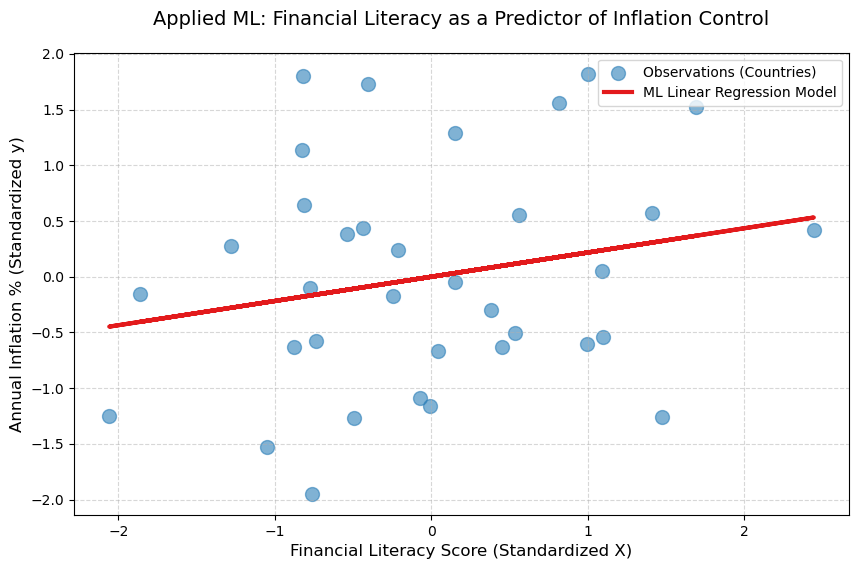

In [248]:
plt.figure(figsize=(10, 6))

# Puntos de los países
plt.scatter(X_std, y_std, color='#2c7fb8', alpha=0.6, s=100, label='Observations (Countries)')

# Línea de regresión calculada por ML
plt.plot(X_std, y_pred, color='#e31a1c', linewidth=3, label='ML Linear Regression Model')

plt.title('Applied ML: Financial Literacy as a Predictor of Inflation Control', fontsize=14, pad=20)
plt.xlabel('Financial Literacy Score (Standardized X)', fontsize=12)
plt.ylabel('Annual Inflation % (Standardized y)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1. Preparamos los datos SIN estandarizar
# Usamos los valores originales de tu DataFrame df_ml
X = df_ml[['Financial Literacy Score']].values
y = df_ml['Inflation'].values

# 2. Creamos y entrenamos el modelo
model = LinearRegression()
model.fit(X, y)

# 3. Realizamos predicciones
y_pred = model.predict(X)

# 4. Obtenemos la información de la regresión
intercepto = model.intercept_
coeficiente = model.coef_[0]
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("--- RESULTADOS DE LA REGRESIÓN (SKLEARN) ---")
print(f"Intercepto (b): {intercepto:.4f}")
print(f"Coeficiente de la pendiente (m): {coeficiente:.4f}")
print(f"R-cuadrado (R2): {r2:.4f}")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

# Interpretación rápida:
print(f"\nInterpretación: Por cada punto que sube el Financial Literacy Score,")
print(f"la inflación varía en {coeficiente:.4f} puntos porcentuales.")

--- RESULTADOS DE LA REGRESIÓN (SKLEARN) ---
Intercepto (b): 3.8140
Coeficiente de la pendiente (m): 0.0297
R-cuadrado (R2): 0.0031
Error Cuadrático Medio (MSE): 10.1725

Interpretación: Por cada punto que sube el Financial Literacy Score,
la inflación varía en 0.0297 puntos porcentuales.


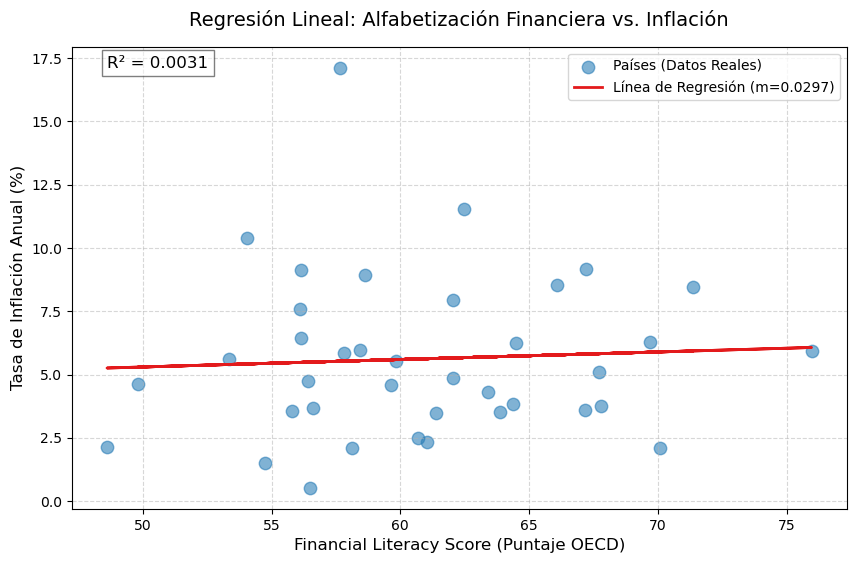

In [209]:
import matplotlib.pyplot as plt

# 1. Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# 2. Graficar los puntos de datos originales (Países)
plt.scatter(X, y, color='#2c7fb8', alpha=0.6, s=80, label='Países (Datos Reales)')

# 3. Graficar la línea de regresión predicha por el modelo
plt.plot(X, y_pred, color='#e31a1c', linewidth=2, label=f'Línea de Regresión (m={coeficiente:.4f})')

# 4. Añadir anotaciones y etiquetas
plt.title('Regresión Lineal: Alfabetización Financiera vs. Inflación', fontsize=14, pad=15)
plt.xlabel('Financial Literacy Score (Puntaje OECD)', fontsize=12)
plt.ylabel('Tasa de Inflación Anual (%)', fontsize=12)

# 5. Estética del gráfico
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Opcional: Añadir el valor de R2 dentro del gráfico para mayor claridad
plt.text(X.min(), y.max(), f'R² = {r2:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

### Inflation vs Financial inclusion

In [272]:
# Descargar datos: Inflación (2023) y Propiedad de Cuentas (2021 - dato más reciente de Findex)
# Usamos labels=True para obtener los nombres de los países
inflation = wb.data.DataFrame('FP.CPI.TOTL.ZG', time=2024, labels=True, skipAggs=True).reset_index()
accounts = wb.data.DataFrame('FX.OWN.TOTL.ZS', time=2024, labels=True, skipAggs=True).reset_index()

In [274]:
inflation

,economy,Country,FP.CPI.TOTL.ZG
0,ZWE,Zimbabwe,NaN
1,ZMB,Zambia,14.985626
2,YEM,"Yemen, Rep.",NaN
3,PSE,West Bank and Gaza,53.669146
4,VIR,Virgin Islands (U.S.),NaN
...,...,...,...
212,AND,Andorra,NaN
213,ASM,American Samoa,NaN
214,DZA,Algeria,4.046115
215,ALB,Albania,2.215874


In [275]:
# Renombrar columnas para facilitar el manejo
inflation.columns = ['ISO3', 'Country', 'Inflation']
accounts.columns = ['ISO3', 'Country_Name', 'Account_Ownership']

In [276]:
# Unir ambos datasets por código ISO3
df_ml = pd.merge(inflation[['ISO3', 'Country', 'Inflation']], 
                 accounts[['ISO3', 'Account_Ownership']], 
                 on='ISO3').dropna()

print(f"Países analizados: {len(df_ml)}")

Países analizados: 132


--- REGRESIÓN SIN ESTANDARIZAR ---
Intercepto: 12.9253
Coeficiente: -0.0743
R-cuadrado: 0.0066


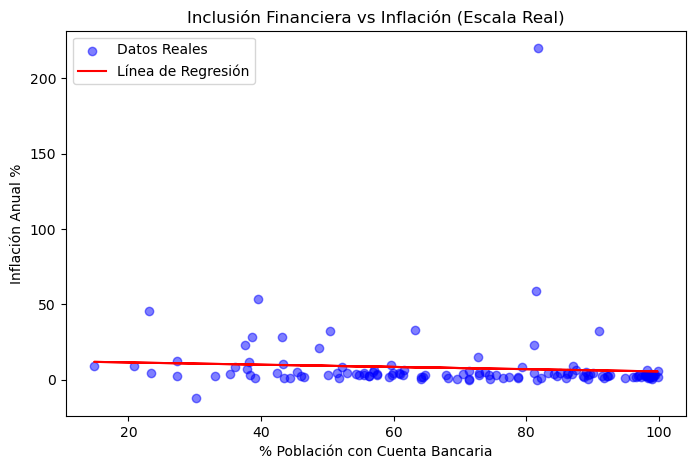

In [277]:
# Preparar matrices
X = df_ml[['Account_Ownership']].values
y = df_ml['Inflation'].values

# Entrenar modelo
model_raw = LinearRegression()
model_raw.fit(X, y)
y_pred_raw = model_raw.predict(X)

print("--- REGRESIÓN SIN ESTANDARIZAR ---")
print(f"Intercepto: {model_raw.intercept_:.4f}")
print(f"Coeficiente: {model_raw.coef_[0]:.4f}")
print(f"R-cuadrado: {r2_score(y, y_pred_raw):.4f}")

# Gráfico 1
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.5, color='blue', label='Datos Reales')
plt.plot(X, y_pred_raw, color='red', label='Línea de Regresión')
plt.title('Inclusión Financiera vs Inflación (Escala Real)')
plt.xlabel('% Población con Cuenta Bancaria')
plt.ylabel('Inflación Anual %')
plt.legend()
plt.show()


--- REGRESIÓN ESTANDARIZADA ---
Coeficiente Estandarizado: -0.0810
R-cuadrado: 0.0066


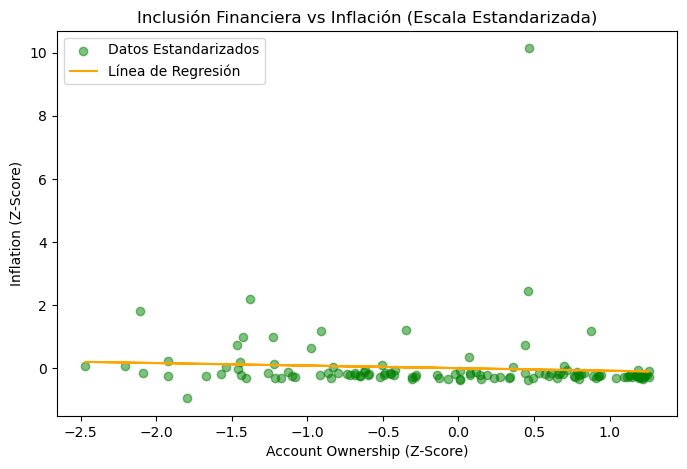

In [278]:
# Aplicar StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_std = scaler_X.fit_transform(X)
y_std = scaler_y.fit_transform(y.reshape(-1, 1))

# Entrenar modelo estandarizado
model_std = LinearRegression()
model_std.fit(X_std, y_std)
y_pred_std = model_std.predict(X_std)

print("\n--- REGRESIÓN ESTANDARIZADA ---")
print(f"Coeficiente Estandarizado: {model_std.coef_[0][0]:.4f}")
print(f"R-cuadrado: {r2_score(y_std, y_pred_std):.4f}")

# Gráfico 2
plt.figure(figsize=(8, 5))
plt.scatter(X_std, y_std, alpha=0.5, color='green', label='Datos Estandarizados')
plt.plot(X_std, y_pred_std, color='orange', label='Línea de Regresión')
plt.title('Inclusión Financiera vs Inflación (Escala Estandarizada)')
plt.xlabel('Account Ownership (Z-Score)')
plt.ylabel('Inflation (Z-Score)')
plt.legend()
plt.show()

In [279]:
# 1. Filtrar el DataFrame original (df_ml)
# Mantenemos solo países con inflación <= 20%
df_clean = df_ml[df_ml['Inflation'] <= 15].copy()

# Opcional: Ver qué países fueron eliminados como outliers
outliers = df_ml[df_ml['Inflation'] > 15]
print(f"Países eliminados (Inflación > 20%): {outliers['Country'].tolist()}")
print(f"Países restantes para el análisis: {len(df_clean)}")

# Preparamos las variables X y y con los datos limpios
X_clean = df_clean[['Account_Ownership']].values
y_clean = df_clean['Inflation'].values

Países eliminados (Inflación > 20%): ['West Bank and Gaza', 'Turkiye', 'Sierra Leone', 'Nigeria', 'Malawi', 'Lebanon', 'Lao PDR', 'Iran, Islamic Rep.', 'Ghana', 'Ethiopia', 'Egypt, Arab Rep.', 'Argentina']
Países restantes para el análisis: 120


In [286]:
# 1. Definir los límites del filtro
limite_superior = 10
limite_inferior = -10  # Opcional: puedes poner -2 si quieres incluir deflación leve

# 2. Filtrar el DataFrame original (df_ml)
# Usamos el operador '&' para cumplir ambas condiciones
df_clean = df_ml[(df_ml['Inflation'] <= limite_superior) & 
                 (df_ml['Inflation'] >= limite_inferior)].copy()

# 3. Identificar quiénes quedaron fuera
outliers_high = df_ml[df_ml['Inflation'] > limite_superior]
outliers_low = df_ml[df_ml['Inflation'] < limite_inferior]

print(f"--- REPORTE DE LIMPIEZA ---")
print(f"Países eliminados por alta inflación (> {limite_superior}%): {outliers_high['Country'].tolist()}")
print(f"Países eliminados por deflación/datos bajos (< {limite_inferior}%): {outliers_low['Country'].tolist()}")
print(f"Total de países para el modelo: {len(df_clean)}")

# 4. Preparar las variables X y y con los datos limpios
X_clean = df_clean[['Account_Ownership']].values
y_clean = df_clean['Inflation'].values

--- REPORTE DE LIMPIEZA ---
Países eliminados por alta inflación (> 10%): ['Zambia', 'West Bank and Gaza', 'Turkiye', 'Sierra Leone', 'Pakistan', 'Nigeria', 'Malawi', 'Lebanon', 'Lao PDR', 'Iran, Islamic Rep.', 'Ghana', 'Gambia, The', 'Ethiopia', 'Egypt, Arab Rep.', 'Bangladesh', 'Argentina']
Países eliminados por deflación/datos bajos (< -10%): ['Iraq']
Total de países para el modelo: 115


--- REGRESIÓN SIN OUTLIERS (ESCALA REAL) ---
Coeficiente: -0.0274
R-cuadrado: 0.0821


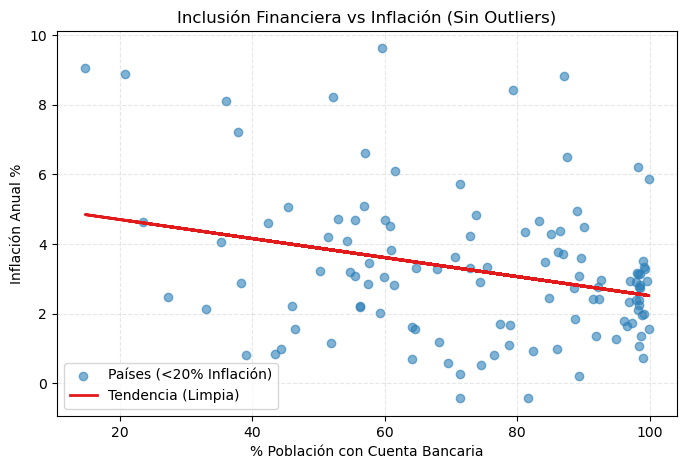

In [287]:
# Modelo con datos reales
model_raw = LinearRegression()
model_raw.fit(X_clean, y_clean)
y_pred_raw = model_raw.predict(X_clean)

print("--- REGRESIÓN SIN OUTLIERS (ESCALA REAL) ---")
print(f"Coeficiente: {model_raw.coef_[0]:.4f}")
print(f"R-cuadrado: {r2_score(y_clean, y_pred_raw):.4f}")

# Gráfico Escala Real
plt.figure(figsize=(8, 5))
plt.scatter(X_clean, y_clean, alpha=0.6, color='#2c7fb8', label='Países (<20% Inflación)')
plt.plot(X_clean, y_pred_raw, color='#e31a1c', linewidth=2, label='Tendencia (Limpia)')
plt.title('Inclusión Financiera vs Inflación (Sin Outliers)')
plt.xlabel('% Población con Cuenta Bancaria')
plt.ylabel('Inflación Anual %')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


--- REGRESIÓN ESTANDARIZADA (SIN OUTLIERS) ---
Coeficiente Estandarizado: -0.2866
R-cuadrado: 0.0821


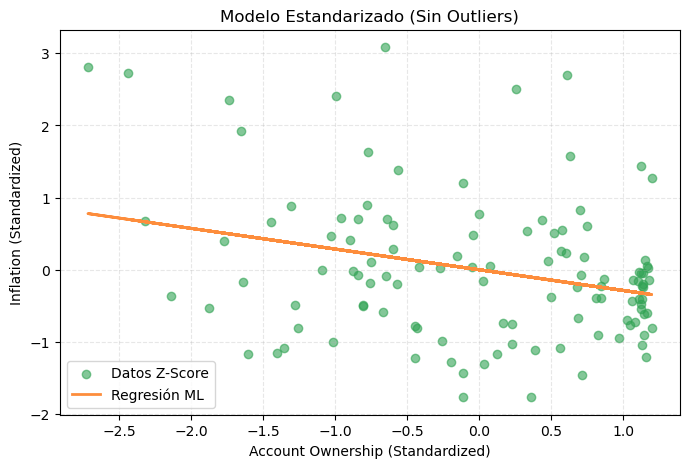

In [294]:
# Estandarización de los datos filtrados
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_std = scaler_X.fit_transform(X_clean)
y_std = scaler_y.fit_transform(y_clean.reshape(-1, 1))

# Entrenar modelo estandarizado
model_std = LinearRegression()
model_std.fit(X_std, y_std)
y_pred_std = model_std.predict(X_std)

print("\n--- REGRESIÓN ESTANDARIZADA (SIN OUTLIERS) ---")
print(f"Coeficiente Estandarizado: {model_std.coef_[0][0]:.4f}")
print(f"R-cuadrado: {r2_score(y_std, y_pred_std):.4f}")

# Gráfico Estandarizado
plt.figure(figsize=(8, 5))
plt.scatter(X_std, y_std, alpha=0.6, color='#31a354', label='Datos Z-Score')
plt.plot(X_std, y_pred_std, color='#fd8d3c', linewidth=2, label='Regresión ML')
plt.title('Modelo Estandarizado (Sin Outliers)')
plt.xlabel('Account Ownership (Standardized)')
plt.ylabel('Inflation (Standardized)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [292]:
# 1. Filtrar outliers (Inflación entre -10% y 10%)
# Usamos el valor absoluto o la condición doble para mayor claridad
df_final = df_ml[(df_ml['Inflation'] <= 10) & (df_ml['Inflation'] >= -10)].copy()

# 2. Estandarizar
# Esto es vital: el promedio y la desviación estándar se recalculan 
# solo con los países que sobrevivieron al filtro de +/- 10%
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_std = scaler_X.fit_transform(df_final[['Account_Ownership']])
y_std = scaler_y.fit_transform(df_final[['Inflation']])

# 3. Entrenar y Predecir (Aprendizaje Supervisado)
model = LinearRegression()
model.fit(X_std, y_std)
y_pred = model.predict(X_std)

# 4. Crear DataFrame para exportación
# Incluimos valores reales para que el tooltip en Vega-Lite sea informativo
df_vega = pd.DataFrame({
    'Country': df_final['Country'],
    'ISO3': df_final['ISO3'],
    'Account_Ownership_Std': X_std.flatten(),
    'Inflation_Std': y_std.flatten(),
    'Regression_Line': y_pred.flatten(),
    'Real_Account_Ownership': df_final['Account_Ownership'],
    'Real_Inflation': df_final['Inflation']
})

# 5. Guardar CSV
# Asegúrate de que la carpeta 'p6' exista o quita el prefijo si no es necesario
df_vega.to_csv('p6_data.csv', index=False)

print(f"Análisis completado. Países en el rango +/- 10% de inflación: {len(df_final)}")

Análisis completado. Países en el rango +/- 10% de inflación: 115


In [293]:
# 1. Crear el DataFrame para exportación con ambas escalas
df_vega = pd.DataFrame({
    'Country': df_final['Country'],
    'ISO3': df_final['ISO3'],
    # Valores estandarizados (para los ejes y la línea de regresión)
    'Account_Ownership_Std': X_std.flatten(),
    'Inflation_Std': y_std.flatten(),
    'Regression_Line': y_pred.flatten(),
    # Valores reales (para que el usuario los entienda en el tooltip)
    'Real_Account_Ownership': df_final['Account_Ownership'],
    'Real_Inflation': df_final['Inflation']
})

# 2. Guardar CSV
df_vega.to_csv('p6/p6_data.csv', index=False)